In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay


* Pregnancies- Number of times pregnant 
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness -Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml) 
* BMI- Body mass index (weight in kg/(height in m)^2) 
* DiabetesPedigreeFunction - Diabetes pedigree function 
* Age - Age (years) 
* Outcome - Class variable (0 - does not diabetes or 1 - has diabetes)

In [3]:
dataset = pd.read_csv("datasets/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
#split dataset in features and target variable
X = dataset.drop(columns=['Outcome'] ,axis = 1) # Features
y = dataset["Outcome"] # Target variable

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred ,labels= logreg.classes_)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[116   9]
 [ 25  42]]
Accuracy of the Model: 82.29166666666666%


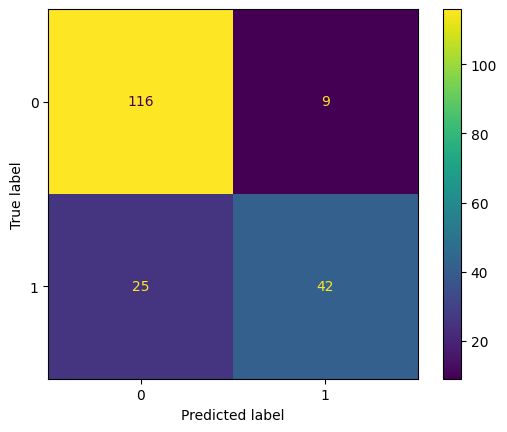

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()


In [17]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



In [20]:
dataset.iloc[100]

Pregnancies                   1.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          39.000
DiabetesPedigreeFunction      1.222
Age                          33.000
Outcome                       1.000
Name: 100, dtype: float64

In [22]:
# Testing on sample data
pregnancies = int(input("Enter New Patient's Number of Pregnancies: "))
glucose = int(input("Enter New Patient's Glucose level: "))
blood_pressure = int(input("Enter New Patient's Blood Pressure: "))
skin_thickness = int(input("Enter New Patient's Skin Thickness: "))
insulin = int(input("Enter New Patient's Insulin level: "))
bmi = float(input("Enter New Patient's BMI: "))
diabetes_pedigree_function = float(input("Enter New Patient's Diabetes Pedigree Function: "))
age = int(input("Enter New Patient's age: "))

sample = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]]
result = logreg.predict(sample)

print(result)

if result == 1:
    print("Patient might have diabetes.")
else:
    print("Patient might not have diabetes.")

[1]
Patient might have diabetes.


e:\Kunal_Barve_Task\ML_Tasks\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
